In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lending_Club_Loan_approval_Optimization (1).csv')
df.shape

(2072806, 6)

In [ ]:
df.head(10)

,Unnamed: 0,Amount Requested,Risk_Score,Debt-To-Income Ratio,Employment Length,Target
0,0,3600.0,677.0,5.91,10,1
1,1,24700.0,717.0,16.06,10,1
2,2,20000.0,697.0,10.78,10,1
3,3,10400.0,697.0,25.37,3,1
4,4,11950.0,692.0,10.20,4,1
5,5,20000.0,682.0,14.67,10,1
6,6,20000.0,707.0,17.61,10,1
7,7,10000.0,687.0,13.07,6,1
8,8,8000.0,702.0,34.80,10,1
9,9,1400.0,702.0,34.95,3,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072806 entries, 0 to 2072805
Data columns (total 6 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   Amount Requested      float64
 2   Risk_Score            float64
 3   Debt-To-Income Ratio  float64
 4   Employment Length     int64  
 5   Target                int64  
dtypes: float64(3), int64(3)
memory usage: 94.9 MB


In [ ]:
df.describe()

,Unnamed: 0,Amount Requested,Risk_Score,Debt-To-Income Ratio,Employment Length,Target
count,2.072806e+06,2.072806e+06,2.072806e+06,2.072806e+06,2.072806e+06,2072806.0
mean,1.036402e+06,1.293403e+04,6.560779e+02,1.173645e+02,3.738213e+00,0.5
std,5.983677e+05,9.483082e+03,8.573350e+01,4.757285e+03,4.046339e+00,0.5
min,0.000000e+00,2.000000e+02,0.000000e+00,-1.000000e+00,0.000000e+00,0.0
25%,5.182012e+05,5.000000e+03,6.130000e+02,1.108000e+01,0.000000e+00,0.0
50%,1.036402e+06,1.000000e+04,6.720000e+02,1.859000e+01,2.000000e+00,0.5
75%,1.554604e+06,1.920000e+04,7.020000e+02,2.807000e+01,8.000000e+00,1.0
max,2.072805e+06,1.400000e+06,9.900000e+02,2.376000e+06,1.000000e+01,1.0


In [ ]:

df["Target"].value_counts()

1    1036403
0    1036403
Name: Target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = df.drop("Target", axis=1)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=190)

In [ ]:
print(X_test.shape)

(518202, 5)


In [ ]:
print(y_test.shape)

(518202,)


Normalisation

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
n_data = MinMaxScaler().fit(X_train)
X_train_n = n_data.transform(X_train)
X_test_n = n_data.transform(X_test)
X_train_n

array([[6.15949031e-01, 3.42906129e-03, 5.95959596e-01, 5.43432802e-06,
        0.00000000e+00],
       [2.10070615e-01, 1.64309187e-03, 6.98989899e-01, 1.28221047e-05,
        0.00000000e+00],
       [2.26208665e-01, 3.78625518e-03, 6.88888889e-01, 1.17414735e-05,
        6.00000000e-01],
       ...,
       [4.84280465e-01, 7.00100014e-03, 7.04040404e-01, 4.91998913e-06,
        1.00000000e+00],
       [4.46040941e-01, 3.42906129e-03, 7.19191919e-01, 1.05517402e-05,
        1.00000000e+00],
       [2.20209060e-02, 9.67995428e-03, 6.93939394e-01, 1.51963761e-05,
        1.00000000e+00]])

Standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train_s = X_train.copy()
X_test_s = X_test.copy()

In [ ]:
num = ['Amount Requested','Risk_Score','Debt-To-Income Ratio','Employment Length']

for i in num:    
    scale = StandardScaler().fit(X_train_s[[i]])
    X_train_s[i] = scale.transform(X_train_s[[i]])
    X_test_s[i] = scale.transform(X_test_s[[i]])

In [ ]:
X_train_s.head(15)


,Unnamed: 0,Amount Requested,Risk_Score,Debt-To-Income Ratio,Employment Length
1276742,1276742,-0.837375,-0.769384,-0.024171,-0.923739
435436,435436,-1.101311,0.419378,-0.020920,-0.923739
468887,468887,-0.784588,0.302833,-0.021396,0.558809
126791,126791,0.746240,0.769014,-0.022960,-0.923739
1647396,1647396,0.746240,-0.396439,-0.022653,-0.923739
1592773,1592773,-1.048524,-0.722766,-0.020330,-0.923739
849151,849151,-0.098355,0.186288,-0.022143,-0.429556
1969062,1969062,-1.154098,-1.806637,-0.024304,-0.923739
127665,127665,0.685534,0.186288,-0.019027,0.311718
1529709,1529709,-1.259673,-1.806637,-0.026060,-0.923739


In [ ]:
X_test_s.head(10)

,Unnamed: 0,Amount Requested,Risk_Score,Debt-To-Income Ratio,Employment Length
1221086,1221086,0.640665,0.302833,-0.021467,0.311718
629017,629017,0.640665,0.361106,-0.021041,-0.429556
565581,565581,-1.101311,0.302833,-0.023330,-0.429556
922442,922442,-1.154098,0.477651,-0.025847,-0.182465
1925635,1925635,-0.309504,-0.571257,-0.013076,-0.923739
267835,267835,0.218368,0.302833,-0.022363,0.558809
329975,329975,1.274111,1.468286,-0.022367,1.547174
577402,577402,0.746240,0.186288,-0.017413,1.547174
2019817,2019817,-1.259673,-0.617875,-0.026334,-0.923739
560413,560413,0.851814,0.477651,-0.023291,1.547174


In [ ]:
print(X_train_s.min())
print(X_train_s.max())

Unnamed: 0              1.000000
Amount Requested       -1.344132
Risk_Score             -7.645559
Debt-To-Income Ratio   -0.026563
Employment Length      -0.923739
dtype: float64
Unnamed: 0              2.072804e+06
Amount Requested        1.464388e+02
Risk_Score              3.892429e+00
Debt-To-Income Ratio    4.400608e+02
Employment Length       1.547174e+00
dtype: float64


Predicting without Feature Scaling

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[210171,  48421],
       [ 31499, 228111]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

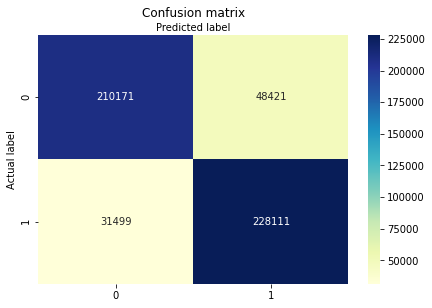

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8457744277328146
Precision: 0.824899107517394
Recall: 0.8786680020030045


Prediction using Normalisation 

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg1 = LogisticRegression()

# fit the model with data
logreg1.fit(X_train_n,y_train)

#
y_pred1=logreg1.predict(X_test_n)

In [ ]:
from sklearn import metrics
cnf_matrix1 = metrics.confusion_matrix(y_test, y_pred1)
cnf_matrix1

array([[203764,  54828],
       [ 18507, 241103]])

Text(0.5, 257.44, 'Predicted label')

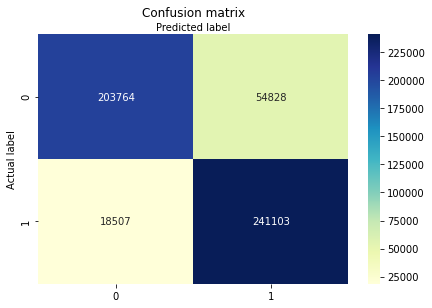

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print("Precision:",metrics.precision_score(y_test, y_pred1))
print("Recall:",metrics.recall_score(y_test, y_pred1))

Accuracy: 0.8584818275498743
Precision: 0.8147270816507902
Recall: 0.9287122992180579


Prediction using Standardisation

In [ ]:
logreg2 = LogisticRegression()

# fit the model with data
logreg2.fit(X_train_s,y_train)

#
y_pred2=logreg2.predict(X_test_s)

In [ ]:
cnf_matrix2 = metrics.confusion_matrix(y_test, y_pred2)
cnf_matrix2

array([[258592,      0],
       [259609,      1]])

Text(0.5, 257.44, 'Predicted label')

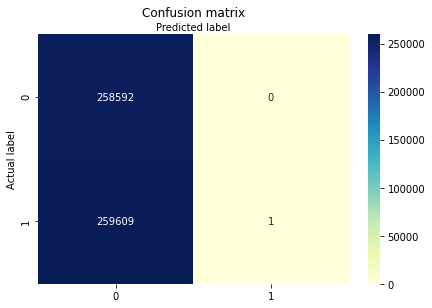

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2))
print("Recall:",metrics.recall_score(y_test, y_pred2))

Accuracy: 0.4990196873034068
Precision: 1.0
Recall: 3.851931743769501e-06


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
from sklearn.model_selection import train_test_split,cross_val_predict

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=36)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(1658244, 5)
(1658244,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

Model_RF = RandomForestClassifier()
Model_RF.fit(X_train, y_train)
y_pred = Model_RF.predict(X_test)
print("Accuracy score of training data {} %:".format(Model_RF.score(X_train, y_train)*100))
print("Accuracy score of testing data {} %".format(Model_RF.score(X_test, y_test)*100))

Accuracy score of training data 99.99915573341438 %:
Accuracy score of testing data 88.22468050617277 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier

Model_RF = RandomForestClassifier(n_estimators=500, max_features=None, max_depth=6, bootstrap=True)
Model_RF.fit(X_train, y_train)
print("Accuracy score of training data {} %:".format(Model_RF.score(X_train, y_train)*100))
print("Accuracy score of testing data {} %".format(Model_RF.score(X_test, y_test)*100))

Accuracy score of training data 88.801587703619 %:
Accuracy score of testing data 88.80818791881552 %
